In [249]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.chdir('C:\\Python36')
%matplotlib inline

In [250]:
full_dataset = pd.read_csv('thads2013n.txt')
full_dataset.columns

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50',
       'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY',
       'TENURE', 'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

In [229]:
# creating a smaller subset of the data to filter the fields we (may) want
interest_group = full_dataset[['BUILT',
                               'FMR',
                               'FMTBEDRMS',
                               'FMTOWNRENT',
                               'FMTREGION',
                               'PER',
                               'TOTSAL', 
                               'VALUE',
                               'ZINC2',
                               'ZSMHC']]
interest_group.head()

,BUILT,FMR,FMTBEDRMS,FMTOWNRENT,FMTREGION,PER,TOTSAL,VALUE,ZINC2,ZSMHC
0,2006,956,'2 2BR','1 Owner','-5',1,0,40000,18021,533
1,1980,1100,'4 4BR+','1 Owner','-5',4,123000,130000,122961,487
2,1985,1100,'4 4BR+','1 Owner','-5',2,28000,150000,27974,1405
3,1985,949,'3 3BR','1 Owner','-5',2,0,200000,32220,279
4,1980,737,'2 2BR','2 Renter','-5',2,96900,-6,96874,759


In [53]:
interest_group.describe()

,BUILT,BURDEN,FMR,PER,TOTSAL,VALUE,ZINC2,ZSMHC
count,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,6.453500e+04,6.453500e+04,64535.000000
mean,1966.432835,2.063421,1164.395181,1.886015,44910.928117,1.420328e+05,6.135584e+04,1061.613744
std,26.304726,116.039132,394.119188,2.566334,64806.938997,2.490278e+05,7.440530e+04,982.274571
min,1919.000000,-9.000000,394.000000,-6.000000,-9.000000,-6.000000e+00,-1.170000e+02,-6.000000
25%,1950.000000,0.116927,888.000000,1.000000,0.000000,-6.000000e+00,1.498700e+04,424.000000
50%,1970.000000,0.220192,1100.000000,2.000000,24000.000000,6.000000e+04,3.998700e+04,838.000000
75%,1985.000000,0.375980,1390.000000,3.000000,67000.000000,2.000000e+05,8.123100e+04,1399.000000
max,2013.000000,15600.000000,3511.000000,20.000000,698886.000000,2.520000e+06,1.061921e+06,10667.000000


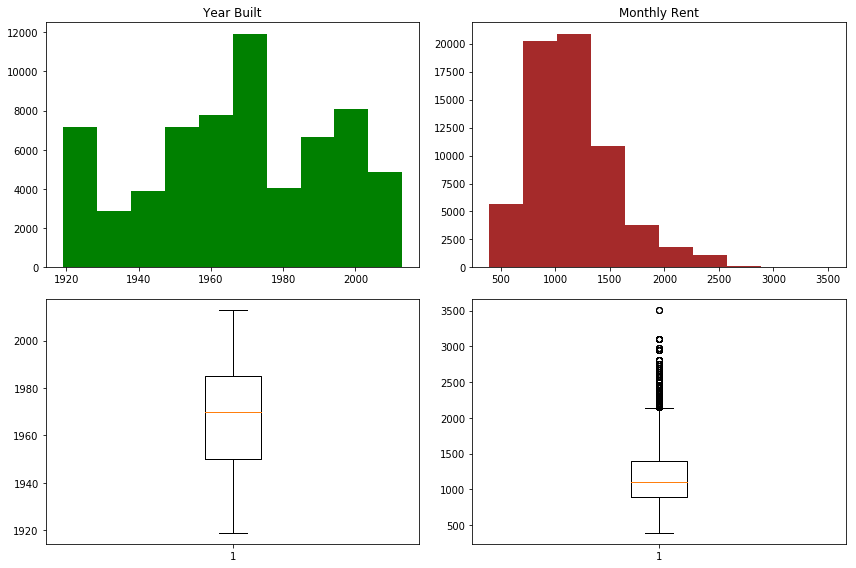

In [226]:
x = interest_group['BUILT']
y = interest_group['FMR']

plt.rcParams['figure.figsize'] = [12,8]

plt.subplot(2,2,1)
plt.title('Year Built')
plt.hist(x, color = 'green', bins = 10)

plt.subplot(2,2,2)
plt.title('Monthly Rent')
plt.hist(y, color = 'brown')

plt.subplot(2,2,3)
plt.boxplot(x)

plt.subplot(2,2,4)
plt.boxplot(y)

plt.tight_layout()
plt.show()

# Analysis

Using the statistics derived from our table above, and the four graphs afterward, we can see different representations of how old housing units in this study were, as well as how much they cost.

In our 2014 study of the years that the housing units were built, 
1. 50% of the housing units date from 1950 to 1985
2. There appear to be no outliers in the years built

As for the rental values,
1. 50% of the housing units lie between $888 and $1390
2. We have a significant number of outliers with rental values that exceed $2143.

# Bedroom Data

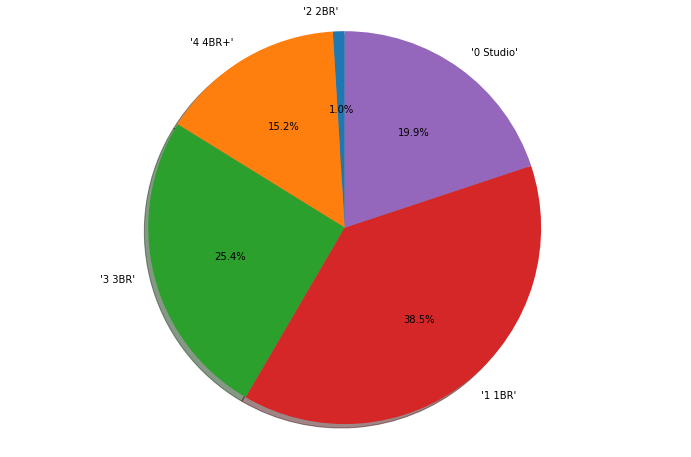

In [230]:
# we only want to look at bedroom data here
bedroom_data = interest_group['FMTBEDRMS']
labels = bedroom_data.unique()
bedroom_size = list(range(6))

# an inelegant solution for counting the total number of each bedroom size
for i in bedroom_data:
    if i == "'0 Studio'":
        bedroom_size[0]+=1
    elif i == "'1 1BR'":
        bedroom_size[1]+=1
    elif i == "'2 2BR'":
        bedroom_size[2]+=1
    elif i == "'3 3BR'":
        bedroom_size[3]+=1
    elif i == "'4 4BR+'":
        bedroom_size[4]+=1
    else:
        bedroom_size[5]+=1
        
# for some reason, 5 entries don't fall into any of the above categories, 
# and were placed into their own element, and removed here
bedroom_size.remove(5)    

# creates a lovely pie chart with the lists we created earlier
fig1, ax1 = plt.subplots()
ax1.pie(bedroom_size, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Analysis

From the pie chart above, we can deduce a few things
1. 1 bedrooms are the most common at 38.5%
2. There are far less 2 bedroom units that we would have anticipated, which cannot be explained by the sample size. We'll need to investigate the source to determine why this might be happening.
3. 4 bedroom units are most likely over-represented since 4 and 4+ are combined
4. 5 units, or about 0.0077% are missing here, which should not affect our results

In [248]:
years = list(range(1919,2014))
counter = [0]*95
total = [0]*95
year_rent = dict(zip(years, total))
units_built = dict(zip(years,counter))
select_group = interest_group[['BUILT','FMR']]

# sums up the rental values by year in year_rent,
# and the number of units built by year in units_built
for index, row in select_group.iterrows():
    year_rent[row['BUILT']]+= row['FMR']
    units_built[row['BUILT']]+= 1

# this loop ideally would return the average
# rental value for each year
for key, value in year_rent.items():
    if value != 0:
        value = value / units_built[key]

In [247]:
for key, value in year_rent.items():
    if value != 0:
        print(value)
        print(units_built[key])
        value = value / (units_built[key])

print(year_rent)
print()
print(units_built)

# placeholder to create year: monthly rent lineplot after the dictionary is fixed
# plt.plot(year_rent.keys(),year_rent.values())

4931367
4285
3455116
2883
3423815
2890
4678105
3915
8818905
7163
9353817
7776
6352439
5626
6969828
6283
4359955
4069
4795771
4165
2934296
2509
5756929
5024
1040259
916
889340
765
790246
682
842874
717
968876
820
1017473
861
967243
820
850534
715
611931
521
416771
359
305207
261
242330
202
302211
247
68605
61
{1919: 4931367, 1920: 3455116, 1921: 0, 1922: 0, 1923: 0, 1924: 0, 1925: 0, 1926: 0, 1927: 0, 1928: 0, 1929: 0, 1930: 3423815, 1931: 0, 1932: 0, 1933: 0, 1934: 0, 1935: 0, 1936: 0, 1937: 0, 1938: 0, 1939: 0, 1940: 4678105, 1941: 0, 1942: 0, 1943: 0, 1944: 0, 1945: 0, 1946: 0, 1947: 0, 1948: 0, 1949: 0, 1950: 8818905, 1951: 0, 1952: 0, 1953: 0, 1954: 0, 1955: 0, 1956: 0, 1957: 0, 1958: 0, 1959: 0, 1960: 9353817, 1961: 0, 1962: 0, 1963: 0, 1964: 0, 1965: 0, 1966: 0, 1967: 0, 1968: 0, 1969: 0, 1970: 6352439, 1971: 0, 1972: 0, 1973: 0, 1974: 0, 1975: 6969828, 1976: 0, 1977: 0, 1978: 0, 1979: 0, 1980: 4359955, 1981: 0, 1982: 0, 1983: 0, 1984: 0, 1985: 4795771, 1986: 0, 1987: 0, 1988: 0,